In [ ]:
# Install libraries (if needed in Colab)
!pip install -q scikit-learn pandas matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload creditcard.csv


Saving creditcard.csv to creditcard (2).csv


In [ ]:
import pandas as pd

df = pd.read_csv("creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Missing values in each column:

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Summary statistics:

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
7

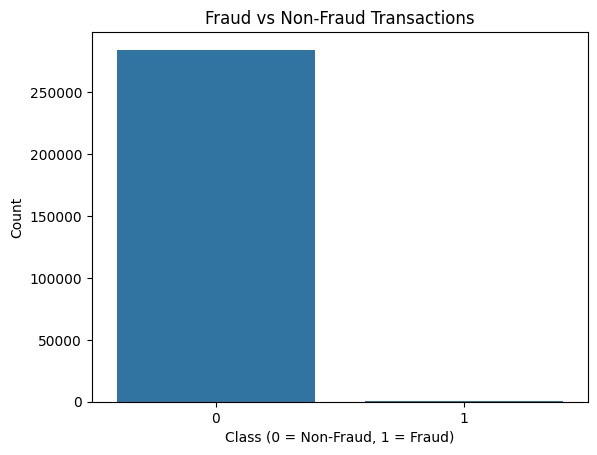

In [ ]:
# Check for null values
print("Missing values in each column:\n")
print(df.isnull().sum())

# Summary statistics
print("\nSummary statistics:\n")
print(df.describe())

# Count plot of fraud vs non-fraud
sns.countplot(x='Class', data=df)
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()


In [ ]:
# Check data types
print("Data types:\n", df.dtypes)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum().sum())  # Should be 0

# Rename target column for clarity (optional)
df.rename(columns={"Class": "IsFraud"}, inplace=True)

# Scale the 'Amount' and 'Time' features (optional preprocessing step)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Scaled_Amount', 'Scaled_Time']] = scaler.fit_transform(df[['Amount', 'Time']])

# Drop original 'Amount' and 'Time' if scaled versions are preferred
df.drop(['Amount', 'Time'], axis=1, inplace=True)

# Final check
df.head()


Data types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Missing values:
 0


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,IsFraud,Scaled_Amount,Scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [ ]:
# Features and label
X = df.drop('IsFraud', axis=1)  # or 'Class' if you didn’t rename it
y = df['IsFraud']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# Create model
model = LogisticRegression(max_iter=1000)

# Fit model
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Accuracy: 0.9992


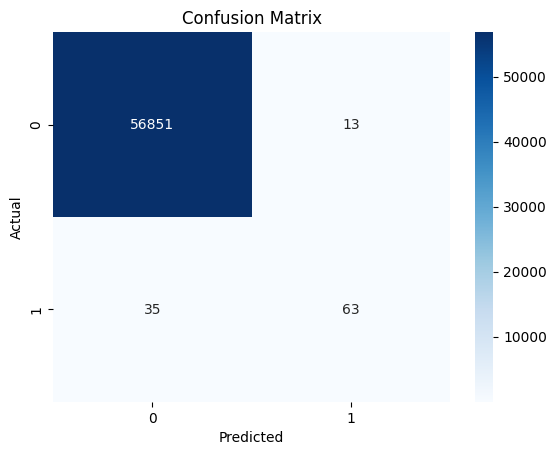

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

Recall (Sensitivity): 0.6429
Specificity (True Negative Rate): 0.9998
F1-Score: 0.7241


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(X_test)

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.4f}".format(accuracy))

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 3. Precision, Recall, F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# 4. Recall (Sensitivity)
TP = cm[1, 1]
FN = cm[1, 0]
recall = TP / (TP + FN)
print(f"Recall (Sensitivity): {recall:.4f}")

# 5. Specificity (True Negative Rate)
TN = cm[0, 0]
FP = cm[0, 1]
specificity = TN / (TN + FP)
print(f"Specificity (True Negative Rate): {specificity:.4f}")

# 6. F1-Score
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
print(f"F1-Score: {f1_score:.4f}")


In [ ]:
# Get coefficients and feature names
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# Sort by absolute value of coefficients (most impactful first)
coefficients['AbsCoefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='AbsCoefficient', ascending=False).drop(columns='AbsCoefficient')

# Display coefficients
print(coefficients)


          Feature  Coefficient
3              V4     0.690861
13            V14    -0.667745
9             V10    -0.634054
12            V13    -0.503158
21            V22     0.482073
26            V27    -0.390473
15            V16    -0.382786
20            V21     0.302326
19            V20    -0.283184
8              V9    -0.196082
7              V8    -0.185843
14            V15    -0.159280
5              V6    -0.115828
11            V12     0.113341
22            V23    -0.099131
28  Scaled_Amount     0.093047
27            V28    -0.090100
4              V5     0.085142
24            V25    -0.076609
10            V11    -0.061896
18            V19    -0.046042
23            V24     0.041168
17            V18    -0.037328
29    Scaled_Time     0.028193
16            V17    -0.018242
1              V2     0.014430
0              V1     0.013807
25            V26    -0.011045
6              V7    -0.002947
2              V3     0.001762
